In [32]:
import numpy as np
import pandas as pd
import import_ipynb
import matplotlib.pyplot as plt

In [5]:
from kmeanspp import kmeanspp, compute_distance

### Assign points to centers

In [6]:
# Input
# centers: existing centroids
# data: numpy array containing all data points
# Output
# Array of centers corresponding to each point
def assign_centers(centers, data):
    allocated_centers = []
    num_of_rows = data.shape[0]
    num_of_centers = len(centers)
    for i in range(num_of_rows):
        point = data[i]
        final_distance = -1
        final = -1
        for j in range(num_of_centers):
            center = centers[j]
            distance = compute_distance(point, center)
            if final_distance == -1:
                final_distance = distance
                final = j
            elif distance < final_distance:
                final_distance = distance
                final = j
        allocated_centers.append(final)
    return allocated_centers

### Update Centers

In [7]:
# Input 
# K : number of clusters
# clustered_data : data grouped into K clusters
# data : numpy 2-d array containing data
# Output
# updated centers

def update_centers(K, clustered_data, data):
    dim = data.shape[1]
    sums = np.zeros(( K, dim+1), dtype = float )
    num_rows = data.shape[0]

    for i in range(num_rows):
        assigned_cluster = clustered_data[i]
        sums[assigned_cluster][-1] += 1
        for j in range(dim):
            sums[assigned_cluster][j] += data[i][j]

    for i in range(K):
        for j in range(dim):
            sums[i][j] /= sums[i][-1]

    centers = []
    for i in range(K):
        centers.append(sums[i][:-1])

    return centers

### Comparing two lists

In [10]:
# Input
# list1 and list2
# Output:
# True if list1 ~ list2 , False otherwise

def check_equality(list1, list2):
    K = len(list1)
    dim = len(list1[0])
    threshold = 1e-3

    for i in range(K):
        for j in range(dim):
            if abs(list1[i][j] - list2[i][j]) > threshold:
                return False

    return True

### Kmeans function

In [30]:
# Input 
# K : number of clusters
# data : numpy 2-d array containing data
# num_of_iteration : no. of iterations of the kmeans algo
# Output
# clustered_data : data grouped into K clusters

def kmeans(K, data, num_of_iteration = 10000):
    centers = kmeanspp(K, data)
    clustered_data = []
    for i in range(num_of_iteration):
        prev_centers = centers
        clustered_data = assign_centers(centers, data)
        centers = update_centers(K, clustered_data, data)
        if check_equality(prev_centers,centers):
            break
    num_rows = data.shape[0]
    
    res = []

    for i in range(num_rows):
        temp = list(data[i])
        temp.append(clustered_data[i])
        res.append(temp)
    
    return np.array(res), centers


### Testing

In [35]:
data = np.array([[4, 5],[4,-5],[-5, 6],[5, -6],[-4, -5],[5, 4],[-5, -6],[5, 6],[5, -4],[5, 5],[5, -5],[-5, 4],[-5, -4],[-5, -5],[-4, 5],[-5, 5]])/5
K = 4
data, centers = kmeans(K, data)
print(data)
print(centers)

First index: 1
[[ 0.8  1.   2. ]
 [ 0.8 -1.   0. ]
 [-1.   1.2  1. ]
 [ 1.  -1.2  0. ]
 [-0.8 -1.   3. ]
 [ 1.   0.8  2. ]
 [-1.  -1.2  3. ]
 [ 1.   1.2  2. ]
 [ 1.  -0.8  0. ]
 [ 1.   1.   2. ]
 [ 1.  -1.   0. ]
 [-1.   0.8  1. ]
 [-1.  -0.8  3. ]
 [-1.  -1.   3. ]
 [-0.8  1.   1. ]
 [-1.   1.   1. ]]
[array([ 0.95, -1.  ]), array([-0.95,  1.  ]), array([0.95, 1.  ]), array([-0.95, -1.  ])]


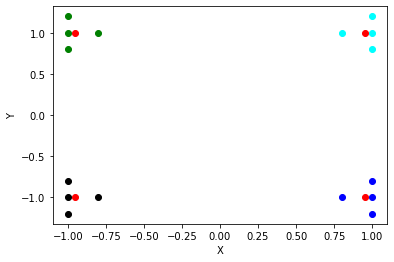

In [37]:
color=['blue','green','cyan','black']
num_rows = data.shape[0]
for i in range(num_rows):
    k = int(data[i][2]) 
    plt.scatter(data[i][0],data[i][1],c=color[k])

for i in range(K):
    plt.scatter(centers[i][0],centers[i][1],c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()